
OUTLINE：
- XGBoost是什么？数学和机器学习原理？
- XGBoost的参数及其使用。
- xgb or xgb的sklearn接口
- XGBoost使用中的问题


### xgboost
DMatrix读取参数，先写参数params={}:why？ 太多了
### xgboost库中的 skelearn中的api
class xgboost.XGBRegressor
> xgboost设定的建模流程来建模，xgboost库本身运算速度快及调参属性比sklearn简单
### XGB的三大板块
XGBoost本身的核心是集于GDB实现的集成算法，整体来说有三个核心部分：集成算法本身、用于集成的弱评估器、其他过程

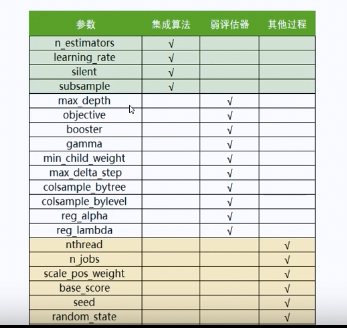




# 梯度提升树：
- 集成算法的弱评估器的要求：比随机猜测好的模型，不低于50%。

- 多种集成弱评估器的方法：

    bagging--一次性建立多个平行独立的弱评估器，然后取平均或者少数服从多数；如RandomForest
    
    boosting：逐一构建弱评估器，晋国多次迭代逐渐累计多个弱评估器的方法；最著名的算法包括Adaboost和梯度提升树，XGB由梯度提升树发展而来。梯度提升树可以有分类树和回归树，两者均以CART树为主流。这意味着**XGBoost中的所有树都是二叉的**。
- GBDT的建模流程：
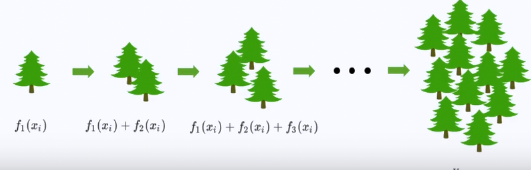
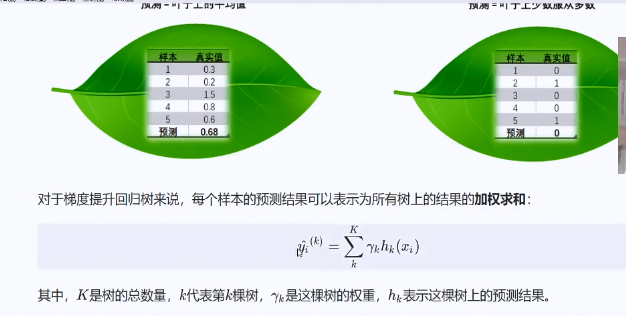
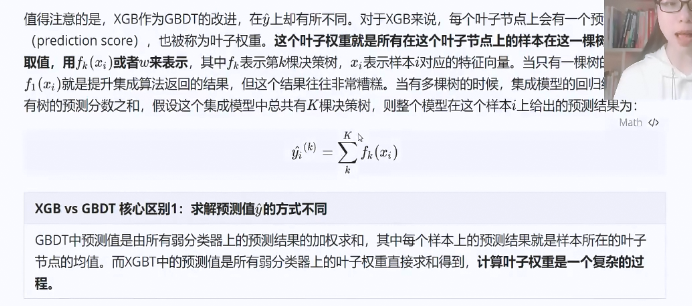
>梯度回归树和xgboost的核心区别
直接求平均和叶子权重

## Param1：超参数K：到底要建多少棵树呢
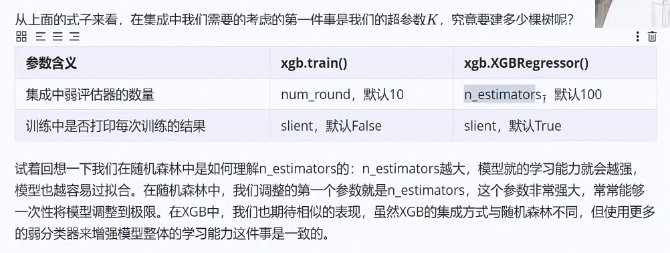

In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

/home/esterl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/esterl/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = load_boston()
X = data.data
y = data.target

In [5]:
X.shape
y.shape
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [7]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)
reg.predict(Xtest)
reg.score(Xtest, Ytest)  # 返回R^2评估指标：残差指标

0.9050988954757183

In [8]:
MSE(Ytest, reg.predict(Xtest))  # 就y的均值来看，还行

8.830916470718748

In [9]:
y.mean()

22.532806324110677

In [10]:
reg.feature_importances_

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

**little tip**:树模型的优势之一：能够查看模型的重要性分数，可以采用**嵌入法**（SelectFromModel）进行特征选择
### 交叉验证，与LinearR和RFR对比

In [18]:
reg = XGBR(n_estimators=100)
CVS(reg,Xtrain,Ytrain,cv=5).mean()  # 与模型本身score方法返回相同的指标，分类acc回归R^2

0.799506280269948

In [17]:
CVS(reg,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-16.215644658473447

In [16]:
# 产看sklearn的所有模型评估指标
import sklearn
np.array(sorted(sklearn.metrics.SCORERS.keys()))

array(['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
       'average_precision', 'balanced_accuracy', 'brier_score_loss',
       'completeness_score', 'explained_variance', 'f1', 'f1_macro',
       'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score',
       'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro',
       'jaccard_samples', 'jaccard_weighted', 'max_error',
       'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error',
       'neg_mean_squared_error', 'neg_mean_squared_log_error',
       'neg_median_absolute_error', 'normalized_mutual_info_score',
       'precision', 'precision_macro', 'precision_micro',
       'precision_samples', 'precision_weighted', 'r2', 'recall',
       'recall_macro', 'recall_micro', 'recall_samples',
       'recall_weighted', 'roc_auc', 'v_measure_score'], dtype='<U28')

In [19]:
# 使用随机森林对比
rfr = RFR(n_estimators=100)
CVS(rfr, Xtrain,Ytrain,cv=5).mean()

0.798906890909475

In [21]:
CVS(rfr,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-17.006891175251507

In [22]:
# 线性回归
LinearR = LinearR()
CVS(LinearR, Xtrain,Ytrain,cv=5).mean()

0.6835070597278078

In [23]:
CVS(LinearR,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-25.3495074936485

In [29]:
# silent参数
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5).mean()  # 与模型本身score方法返回相同的指标，分类acc回归R^2

0.7719827689738533

### n_estimators的学习曲线

In [34]:
from sklearn.model_selection import learning_curve

In [50]:
def plot_learning_curve(estimator, title,X, y,
                        ax,  # 选定的子图
                        ylim=None,
                        cv=None,
                        n_jobs=None                        
                       ):
    # 输入： 分类器，数据，画图的参数，交叉验证的模式
    train_size, train_scores, test_scores = learning_curve(estimator # 分类器
                                                          , X, y
                                                          , cv=cv # 交叉验证模式
#                                                           , random_state=420 # 抽取样本的随机性
                                                          , n_jobs=n_jobs # 每次运行时可并行使用的线程，-1表示所有（谨慎使用）
                                                          )
    if ax == None:
        ax = plt.gca()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.plot(train_size, np.mean(train_scores, axis=1),'o-', color='r', label= 'training score')
    ax.plot(train_size, np.mean(test_scores, axis=1),'o-', color='g', label= 'testing score')
    ax.legend(loc='best')
    return ax
    

In [45]:
cv = KFold(n_splits=5,shuffle=True, random_state=420) # 交叉验证模式

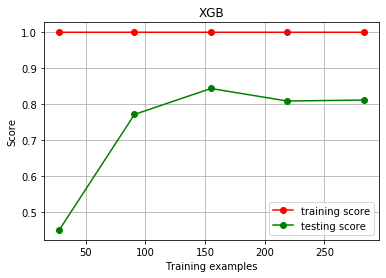

In [55]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420), 'XGB', Xtrain, Ytrain, ax=None, cv=cv)
plt.show()

# 处于过拟合状态

**little tip:**两种减少误差的调参方式，降低在训练集上的表现or提升在测试集上的表现（prefered）

55 0.8131284506183644


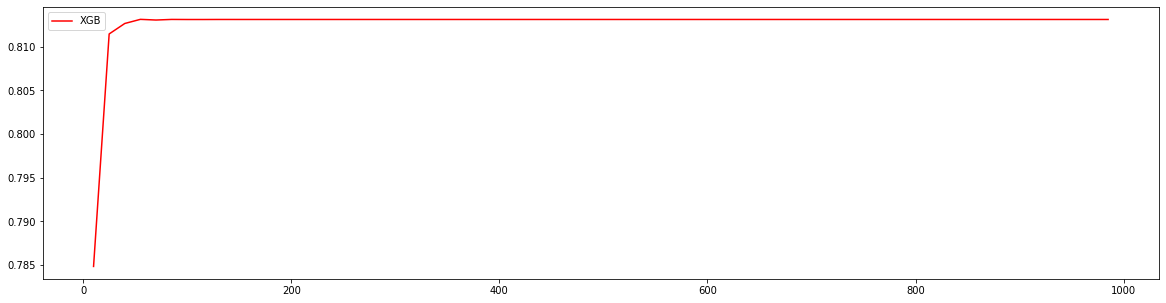

In [74]:
# n_estimators调参
axisx = range(10,1000,15)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))], max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='red',label='XGB')
plt.legend()
plt.show()

> 选出来的n_estimators不合常理，课件600课 ，我觉得她有问题

0.6 0.8189425656811627 0.0037270882578554995
0.24210526315789474 0.0012030771332541793 0.7496180439593625
0.43157894736842106 0.03520362424224215 0.8181931049584943 0.0021498771576090826


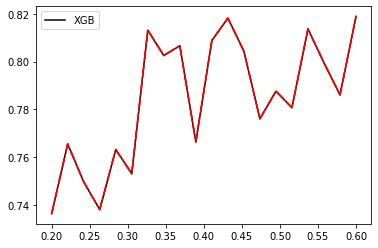

In [87]:
axisx = np.linspace(0.2,0.6,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=240, subsample=i, random_state=0)
    cvResult = CVS(reg, Xtrain, Ytrain, cv=cv)
    # 记录1-偏差
    rs.append(cvResult.mean())
    # 记录2-方差
    var.append(cvResult.var())
    # 计算泛化误差的可控部分
    ge.append((1-cvResult.mean())**2+cvResult.var())
    
# 打印R2最高所对应的参数取值，并打印该参数下的方差
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
# 打印方差对应最低的参数取值，并打印该参数下的R2
print(axisx[var.index(min(var))], min(var), rs[var.index(min(var))])
# 打印泛化误差可控部分的参数取值，并打印该参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))], min(ge), rs[ge.index(min(ge))],var[ge.index(min(ge))])

rs = np.array(rs)
var = np.array(var)*0.01

plt.figure()
plt.plot(axisx,rs,c='black',label='XGB')
# 添加方差线
plt.plot(axisx, rs+var, c='red', linestyle='-.')
plt.plot(axisx, rs-var, c='red', linestyle='-.')
plt.legend()
plt.show()


In [70]:
# 验证模型效果是否提高
time0 = time()
print(XGBR(n_estimators=100).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988954757183
0.1345353126525879


In [71]:
time0 = time()
print(XGBR(n_estimators=55).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9051034894356231
0.17684340476989746


In [73]:
time0 = time()
print(XGBR(n_estimators=130).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050588531646878
0.16529202461242676


 ### n_estimator参数总结

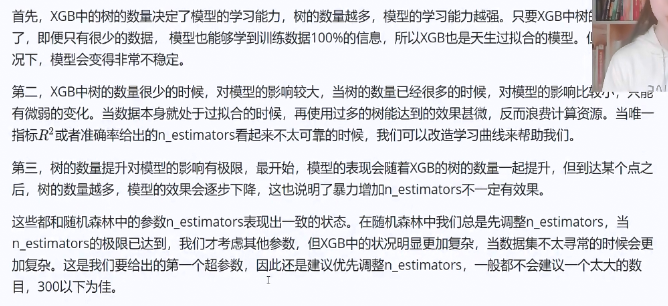
>先学习其他参数，再来对n_estimators调整，与其他参数一起网格搜索；开始300以下，若数据量过大，可考虑适量增加；

>天生过拟合模型->剪枝(**树模型的重要操作**)

>与随机森林不同，XGBoost的n_estimators与许多参数均有关，单一地调整n_estimators并不会对模型有像随机森林那样的效果

## **Param2**: 控制有效有放回随机抽样subsample
-  确定了树的数量，怎么保证整体模型的效果变强了呢。对所有boosting算法来说：美构建一个评估器，效果都比之前效果要好，即迭代一次，增加一棵树，训练效果增加。最后实现集成模型的最优化。怎么实现呢？首先从训练数据上着手。
数据集庞大，而**树模型是天生过拟合的模型**，数据量过大的话，树模型的计算会非常缓慢。因此我们要对原始数据集进行有放回抽样（bootstap），每次只抽取一个样本，若需要N个样本，则抽取N次。每次抽取是独立的。

- 梯度提升树抽取数据建模的流程：
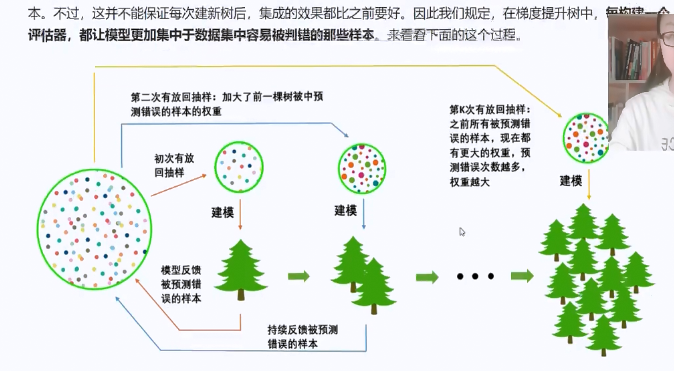
**注意：**第一次是真有放回随机抽样


- 参数含义：随机抽样的时候抽取样本的比例
xgb.train():subsample,默认1
xgb.XGBRegressor, 默认1

另一个方面来说，有放回的随机抽样对于样本量较少的数据集来说，抽样的样本更加的少；而更加少的样本模型学习到的规则更加具体，从而更不适于测试样本。所以**subsample参数通常是在样本量本身很大**的时候来调整

In [93]:
# 验证模型效果是否提高
time0 = time()
print(XGBR(n_estimators=180,subsample=0.77).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.8855903486818051
0.19566082954406738


### subsample参数总结
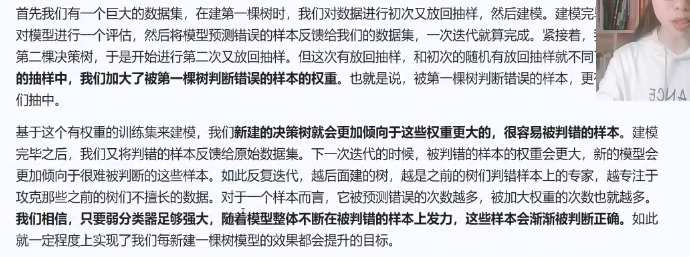
boston的数据量过小，调整subsample参数对其没有很好的效果，与理论推导一致。
## **Param3**：迭代决策树：重要参数eta
从上面建模流程来看，每次迭代时应该加重上次迭代的模型中预测错误的样本的权重，让模型更倾向于努力攻克难以判断的样本。但是并不是只要新建于倾向困难样本的决策树，就能够帮助将困难样本判断正确。**所以除了让模型倾向于困难样本方向(对数据处理),我们还必须控制新弱分类器，保证每次新添加的树一定得时对新数据集预测效果最优的那一课**
>怎么保证每次新添加的树一定会让集成学习的效果提升?
枚举？ 数据量大，算个3天3夜
也许可以参考sklearn中构建决策树模型：不是算信息熵后分枝而是随机选择特征生成固定数目的树，然后生成最好的那一棵？但是不能保证

**平衡算法表现和运算速度是机器学习的艺术。**我们希望找出一种方法，直接帮我们求解出最优的集成算法结果。梯度下降，转换为最优化问题来直接求解出最优的集成算法结果。以下是与对数几率回归的对比：
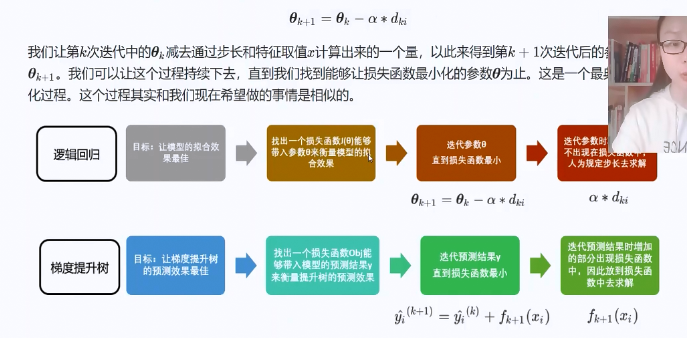
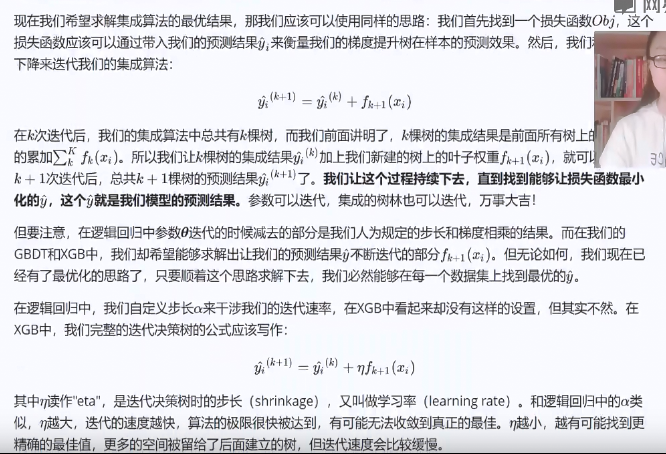

- 参数含义
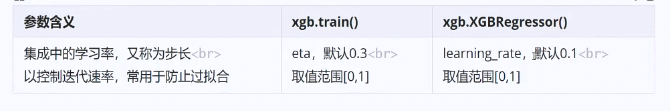

网格搜索：n_estimator,eta

In [107]:
# 定义评分函数
def regassess(reg, Xtrain, Ytrain, cv, scoring=['r2'], show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print('{}:{:.2f}'.format(scoring[i] # 模型评价指标的名字
                                     ,CVS(reg
                                         ,Xtrain
                                         ,Ytrain
                                         ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [101]:
reg = XGBR(n_estimators=180,random_state=420)

In [108]:
regassess(reg, Xtrain, Ytrain, cv, scoring=['r2','neg_mean_squared_error'])

r2:0.81
neg_mean_squared_error:-13.80


[0.8131149530657721, -13.797195533663736]

In [110]:
# 观察eta对模型的影响

for i in [0,0.2,0.5,1]:
    reg = XGBR(n_estimators=180, random_state=420,eta=i)
    print('learning_rate:{}'.format(i))
    time0 = time()
    regassess(reg,
       Xtrain,Ytrain,
       cv, scoring=['r2','neg_mean_squared_error'])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print('\t')

learning_rate:0
r2:-6.57
neg_mean_squared_error:-567.83
00:01:319989
	
learning_rate:0.2
r2:0.83
neg_mean_squared_error:-12.79
00:01:395558
	
learning_rate:0.5
r2:0.79
neg_mean_squared_error:-14.64
00:00:732747
	
learning_rate:1
r2:0.65
neg_mean_squared_error:-24.99
00:00:653287
	


## 总结梯度提升树GBDT
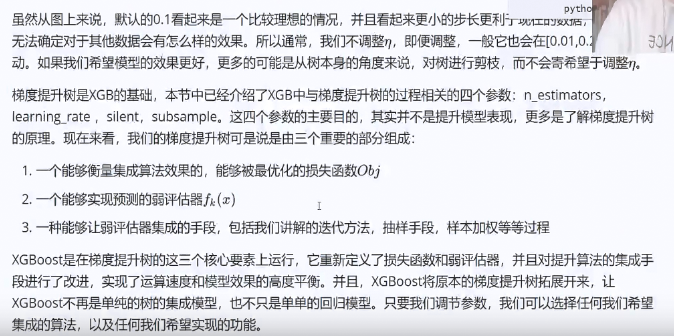
XGB以梯度提升树为基础，以上4个与梯度提升树有关的参数：n_estimator,learning_rate,silent,subsample，目的都是更好的理解原理，以下对与xgb直接相关的参数进行介绍

